In [126]:
#Importando as Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [127]:
#Comando para selecionar o arquivo gerado pelo programa de ETL
from google.colab import files
arquivo = files.upload()

Saving all_bovespa.csv to all_bovespa (1).csv


In [128]:
#Leitura do arquivo Bobespa (Colocar aqui o nome do seu arquivo)
df = pd.read_csv('all_bovespa.csv', delimiter=',') 

In [129]:
#Definindo a variável com o Ticker da ação desejada
df_itau = df[df['sigla_acao'] == 'ITUB4']

In [130]:
#Verificar os tipos
df_itau.dtypes

data_pregao          object
sigla_acao           object
nome_acao            object
preco_abertura      float64
preco_maximo        float64
preco_minimo        float64
preco_fechamento    float64
qtd_negocios          int64
volume_negocios       int64
dtype: object

In [132]:
#Formatando a data
df_itau['data_pregao']=pd.to_datetime(df_itau['data_pregao'],format='%Y-%m-%d')

<ipython-input-132-01abecf81850>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [133]:
#Verificar os tipos
df_itau.dtypes

data_pregao         datetime64[ns]
sigla_acao                  object
nome_acao                   object
preco_abertura             float64
preco_maximo               float64
preco_minimo               float64
preco_fechamento           float64
qtd_negocios                 int64
volume_negocios              int64
dtype: object

In [217]:
#Definindo o filtro de data
df_itau_2020=df_itau[df_itau['data_pregao']<='2021-01-01']

In [218]:
#Verificação do data frame
df_itau_2020

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios
202,2020-01-02,ITUB4,ITAUUNIBANCO,37.28,38.03,36.99,38.03,20666100,-2147483648
844,2020-01-03,ITUB4,ITAUUNIBANCO,37.50,38.24,37.45,37.63,24891400,-2147483648
845,2020-01-06,ITUB4,ITAUUNIBANCO,37.55,37.58,36.91,37.07,22294700,-2147483648
2273,2020-01-07,ITUB4,ITAUUNIBANCO,37.07,37.24,36.21,36.21,20000900,-2147483648
2274,2020-01-08,ITUB4,ITAUUNIBANCO,36.45,36.81,35.62,35.62,25980900,-2147483648
...,...,...,...,...,...,...,...,...,...
120314,2020-12-22,ITUB4,ITAUUNIBANCO,31.17,31.65,31.15,31.25,19659000,-2147483648
120315,2020-12-23,ITUB4,ITAUUNIBANCO,31.32,32.05,31.27,31.94,19959200,-2147483648
120316,2020-12-28,ITUB4,ITAUUNIBANCO,32.22,32.43,32.01,32.17,15444600,-2147483648
120317,2020-12-29,ITUB4,ITAUUNIBANCO,32.27,32.39,31.93,32.10,16384200,-2147483648


In [219]:
#Definindo data do pregao como índice
df_itau_2020=df_itau_2020.set_index(pd.DatetimeIndex(df_itau_2020['data_pregao'].values))

In [220]:
#Verificação do data frame
df_itau_2020

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios
2020-01-02,2020-01-02,ITUB4,ITAUUNIBANCO,37.28,38.03,36.99,38.03,20666100,-2147483648
2020-01-03,2020-01-03,ITUB4,ITAUUNIBANCO,37.50,38.24,37.45,37.63,24891400,-2147483648
2020-01-06,2020-01-06,ITUB4,ITAUUNIBANCO,37.55,37.58,36.91,37.07,22294700,-2147483648
2020-01-07,2020-01-07,ITUB4,ITAUUNIBANCO,37.07,37.24,36.21,36.21,20000900,-2147483648
2020-01-08,2020-01-08,ITUB4,ITAUUNIBANCO,36.45,36.81,35.62,35.62,25980900,-2147483648
...,...,...,...,...,...,...,...,...,...
2020-12-22,2020-12-22,ITUB4,ITAUUNIBANCO,31.17,31.65,31.15,31.25,19659000,-2147483648
2020-12-23,2020-12-23,ITUB4,ITAUUNIBANCO,31.32,32.05,31.27,31.94,19959200,-2147483648
2020-12-28,2020-12-28,ITUB4,ITAUUNIBANCO,32.22,32.43,32.01,32.17,15444600,-2147483648
2020-12-29,2020-12-29,ITUB4,ITAUUNIBANCO,32.27,32.39,31.93,32.10,16384200,-2147483648


In [221]:
#Calculo médias móveis dos 12 dias (Rápida quantidade de dias reduzidos)
rapidaMME=df_itau_2020.preco_fechamento.ewm(span=12).mean()

In [222]:
#Calculo médias móveis 26 dias (Lenta quantidade de dias amplos)
lentaMME=df_itau_2020.preco_fechamento.ewm(span=26).mean()

In [223]:
#Calculo do MACD (Moving Average Convergence Divergence)
MACD=rapidaMME - lentaMME

In [224]:
#Calculo do sinal é a linha de gatilho para entrada e saída da ação com janela de 9 dias.
sinal=MACD.ewm(span=9).mean()

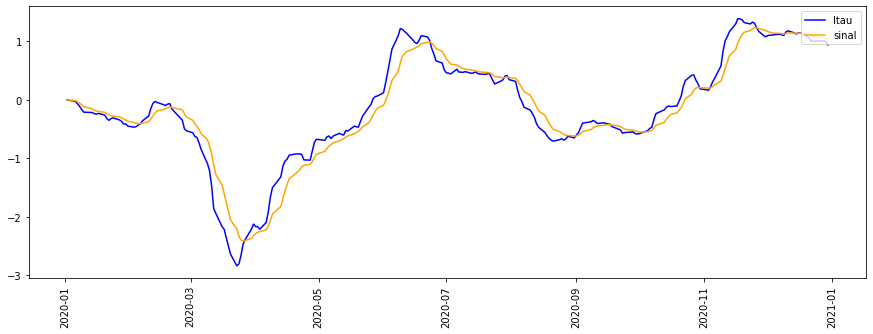

In [225]:
#Plotando Gráfico para visualização
plt.figure(figsize=(15,5))
plt.plot(df_itau_2020.index, MACD , label = 'Itau', color='blue')
plt.plot(df_itau_2020.index, sinal , label = 'sinal', color='orange')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

In [226]:
#Inserindo MACD e sinal dentro do Data Frame
df_itau_2020['MACD'] = MACD
df_itau_2020['sinal'] = sinal
df_itau_2020

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,MACD,sinal
2020-01-02,2020-01-02,ITUB4,ITAUUNIBANCO,37.28,38.03,36.99,38.03,20666100,-2147483648,0.000000,0.000000
2020-01-03,2020-01-03,ITUB4,ITAUUNIBANCO,37.50,38.24,37.45,37.63,24891400,-2147483648,-0.008974,-0.004986
2020-01-06,2020-01-06,ITUB4,ITAUUNIBANCO,37.55,37.58,36.91,37.07,22294700,-2147483648,-0.028801,-0.014746
2020-01-07,2020-01-07,ITUB4,ITAUUNIBANCO,37.07,37.24,36.21,36.21,20000900,-2147483648,-0.068162,-0.032841
2020-01-08,2020-01-08,ITUB4,ITAUUNIBANCO,36.45,36.81,35.62,35.62,25980900,-2147483648,-0.111593,-0.056268
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,2020-12-22,ITUB4,ITAUUNIBANCO,31.17,31.65,31.15,31.25,19659000,-2147483648,1.000070,1.097079
2020-12-23,2020-12-23,ITUB4,ITAUUNIBANCO,31.32,32.05,31.27,31.94,19959200,-2147483648,0.999989,1.077661
2020-12-28,2020-12-28,ITUB4,ITAUUNIBANCO,32.22,32.43,32.01,32.17,15444600,-2147483648,1.006878,1.063505
2020-12-29,2020-12-29,ITUB4,ITAUUNIBANCO,32.27,32.39,31.93,32.10,16384200,-2147483648,0.995216,1.049847


In [227]:
#Plotando gráfico com os valores da ação (Abertura, Máximo, Mínimo, Fechamento)

#Importando as bibliotecas
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

#Definindo Mínimo e Máximo
minimo=min([min(df_itau_2020['sinal']),min(df_itau_2020['MACD'])])
maximo=max([max(df_itau_2020['sinal']),max(df_itau_2020['MACD'])])


#Criação de Sub Plots

#Candlestick
fig = make_subplots(vertical_spacing = 0, rows=2, cols=1, row_heights=[4,3])

fig.add_trace(go.Candlestick(x=df_itau_2020.index, open= df_itau_2020['preco_abertura'], high=df_itau_2020['preco_maximo'],
                          low=df_itau_2020['preco_minimo'], close= df_itau_2020['preco_fechamento']))

#Cálculo do MACD
fig.add_trace(go.Scatter(x=df_itau_2020.index, y = df_itau_2020['MACD'], name='MACD', line = dict(color='blue')), row=2, col=1)
fig.add_trace(go.Scatter(x=df_itau_2020.index, y = df_itau_2020['sinal'], name='Sinal', line = dict(color='yellow')), row=2, col=1)


#Ajustes de posicionamente dos gráficos
fig.update_layout(xaxis_rangeslider_visible=False,
                  xaxis=dict(zerolinecolor='black', showticklabels=False),
                  xaxis2=dict(showticklabels=False))
fig['layout']['yaxis2'].update(range=[minimo,maximo])

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=False)
fig.show()